# Imports

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# 1. Data Reading

In [2]:
background = Table().read_table('Background.csv')
grades = Table().read_table('Grades.csv') 

# 2. Columns & Rows reporting

In [3]:
backgroundLabels=background.labels
backgroundNumRow=background.num_rows

gradeLabels=grades.labels
gradeNumRow=grades.num_rows
print("Background Labels:\n",backgroundLabels,"\nBackground Num of Rows:",backgroundNumRow,"\n")
print("Grade Labels:\n",gradeLabels,"\nGrade Num of Rows:",gradeNumRow)

Background Labels:
 ('ID', 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course') 
Background Num of Rows: 1000 

Grade Labels:
 ('ID', 'math score', 'reading score', 'writing score') 
Grade Num of Rows: 1000


# 3. Average grade

In [4]:
mathScores=grades.column("math score")
readingScores=grades.column("reading score")
writingScores=grades.column("writing score")

avarageArray=((4*mathScores) + (3*readingScores) + (3*writingScores))/10
grades = grades.with_column("Average Score",avarageArray)
grades

ID,math score,reading score,writing score,Average Score
0,72,72,74,72.6
1,69,90,88,81
2,90,95,93,92.4
3,47,57,44,49.1
4,76,78,75,76.3
5,71,83,78,76.7
6,88,95,92,91.3
7,40,43,39,40.6
8,64,64,67,64.9
9,38,60,50,48.2


# 4. Sorting

In [5]:
grades.sort("Average Score",descending = True)

ID,math score,reading score,writing score,Average Score
962,100,100,100,100
916,100,100,100,100
458,100,100,100,100
114,99,100,100,99.6
712,98,100,99,98.9
625,100,97,99,98.8
179,97,100,100,98.8
165,96,100,100,98.4
149,100,100,93,97.9
685,94,99,100,97.3


In [6]:
"Who received more than 95 are ",grades.where("Average Score",are.above(95)).num_rows

('Who received more than 95 are ', 20)

# 5. Scatter Plots

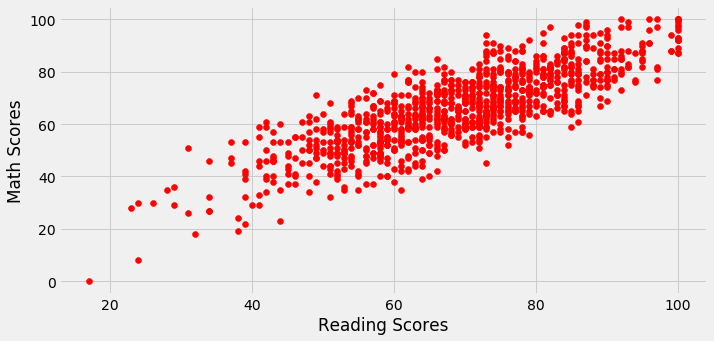

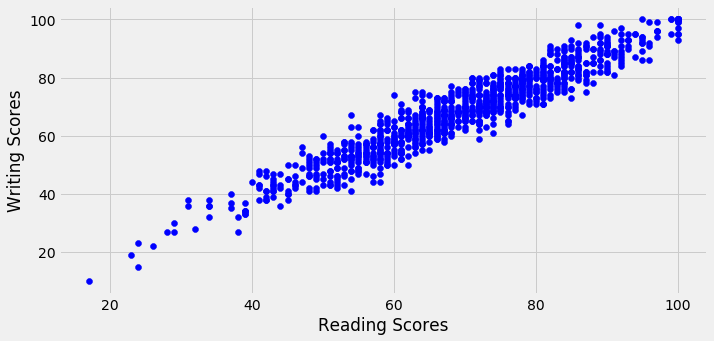

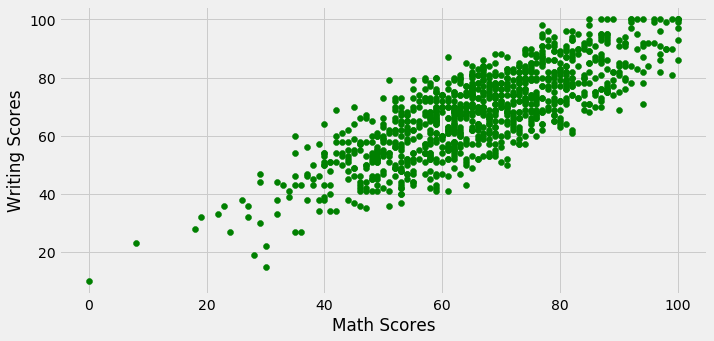

In [7]:
def scatter(xData,yData,xLabel,yLabel,color): #Function for creating plot
    fig, ax = plots.subplots()
    ax=fig.add_axes([0,0,1.5,1])
    ax.set_xlabel(xLabel)
    ax.set_ylabel(yLabel)
    plots.scatter(xData,yData,color=color)
    plots.show()

scatter(readingScores,mathScores,'Reading Scores','Math Scores','r')
scatter(readingScores,writingScores,'Reading Scores','Writing Scores','b')
scatter(mathScores,writingScores,'Math Scores','Writing Scores','g')

# 6. Gender Analysis

In [14]:
genderScoreTable=Table().with_columns(
    'gender',background.column("gender"),
    'math',grades.column("math score"),
    'reading',grades.column("reading score"),
    'writing',grades.column("writing score"),
    'average',grades.column("Average Score"),
)# Create new table with gender information
femaleCount,maleCount=genderScoreTable.group("gender").column("count") #Gets female and male numbers

groupedTable=genderScoreTable.group("gender",sum)
maleData=groupedTable.where("gender",are.equal_to("male")) #Creates male table
femaleData=groupedTable.where("gender",are.equal_to("female")) #Creates female table

genderAverageTable=Table().with_columns( 
    "gender",groupedTable.column("gender"),
    "math avg",make_array((femaleData['math sum']/femaleCount)[0],(maleData['math sum']/maleCount)[0]),
    "reading avg",make_array((femaleData['reading sum']/femaleCount)[0],(maleData['reading sum']/maleCount)[0]),
    "writing avg",make_array((femaleData['writing sum']/femaleCount)[0],(maleData['writing sum']/maleCount)[0]),
    "average",make_array((femaleData['average sum']/femaleCount)[0],(maleData['average sum']/maleCount)[0])
) #Creates table where columns are average of that column

femaleAvg=genderAverageTable.where("gender",are.equal_to("female")).column("average").mean()
maleAvg=genderAverageTable.where("gender",are.equal_to("male")).column("average").mean()

if femaleAvg>maleAvg:
    print("Female average is greater.")
elif femaleAvg<maleAvg:
    print("Male average is greater.")
else:
    print("Male and Female average is equal.")
    
genderAverageTable

Female average is greater.


gender,math avg,reading avg,writing avg,average
female,63.6332,72.6081,72.4672,68.9759
male,68.7282,65.473,63.3112,66.1266


# 7. Letter Grade

In [9]:
def checkGrade(x):
    if x>=90:
        return "A"
    elif x<90 and x>=80:
        return "B"
    elif x<80 and x>=70:
        return "C"
    elif x<70 and x>=60:
        return "D"
    else:
        return "F"

mathLetter=grades.apply(checkGrade,"math score")
readingLetter=grades.apply(checkGrade,"reading score")
writingLetter=grades.apply(checkGrade,"writing score")
avgLetter=grades.apply(checkGrade,"Average Score")

grades=grades.with_columns(
    "Math Letter",mathLetter,
    "Reading Letter",readingLetter,
    "Writing Letter",writingLetter,
    "Letter Grade",avgLetter,
)
grades

ID,math score,reading score,writing score,Average Score,Math Letter,Reading Letter,Writing Letter,Letter Grade
0,72,72,74,72.6,C,C,C,C
1,69,90,88,81,D,A,B,B
2,90,95,93,92.4,A,A,A,A
3,47,57,44,49.1,F,F,F,F
4,76,78,75,76.3,C,C,C,C
5,71,83,78,76.7,C,B,C,C
6,88,95,92,91.3,B,A,A,A
7,40,43,39,40.6,F,F,F,F
8,64,64,67,64.9,D,D,D,D
9,38,60,50,48.2,F,D,F,F


In [10]:
letterFrequencyTable=grades.group("Letter Grade").sort("count",descending = True) # Descending order frequency

print("Most frequent letter grade is",letterFrequencyTable["Letter Grade"][0],"with",letterFrequencyTable["count"][0],"frequency")
letterFrequencyTable

Most frequent letter grade is F with 288 frequency


Letter Grade,count
F,288
D,262
C,254
B,147
A,49


# 8. Race/Ethnic Group Analysis

In [11]:
raceLetterTable=Table().with_columns(
    "race/ethnicity",background.column("race/ethnicity"),
    "Letter Grade",grades.column("Letter Grade")
)
raceLetterCountTable=raceLetterTable.where("Letter Grade",are.equal_to("F")).group("race/ethnicity").sort("count",descending=True)
print("Most failed ethnic is",raceLetterCountTable["race/ethnicity"][0],"with",raceLetterCountTable["count"][0],"frequency")
raceLetterCountTable

Most failed ethnic is group C with 98 frequency


race/ethnicity,count
group C,98
group D,66
group B,60
group A,40
group E,24


# 9. Failed Math, More than 70 Reading

In [12]:
grades.where("math score",are.below(60)).where("writing score",are.above_or_equal_to(70)) # Where chain below 60 on math but above 70 on writing

ID,math score,reading score,writing score,Average Score,Math Letter,Reading Letter,Writing Letter,Letter Grade
48,57,74,76,67.8,F,C,C,D
70,58,63,73,64,F,D,C,D
105,58,67,72,64.9,F,D,C,D
108,52,76,70,64.6,F,C,C,D
167,58,76,78,69.4,F,C,C,D
220,56,68,74,65,F,D,C,D
224,52,66,73,62.5,F,D,C,D
277,59,63,75,65,F,D,C,D
314,59,64,75,65.3,F,D,C,D
354,59,71,70,65.9,F,C,C,D


# 10. Course Preparation Distributions

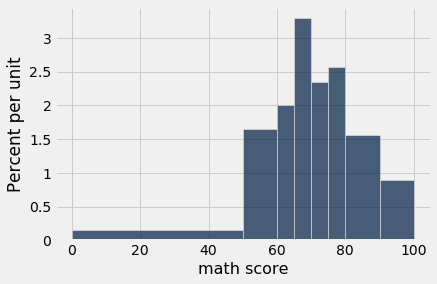

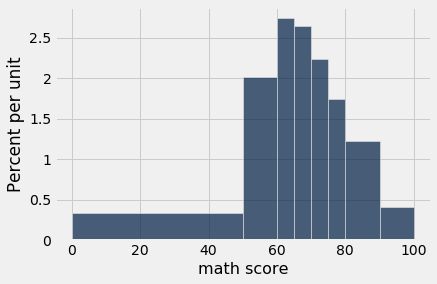

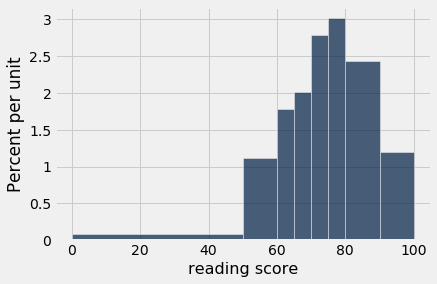

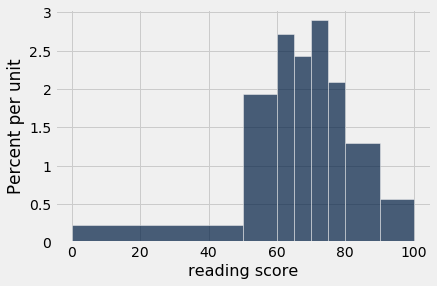

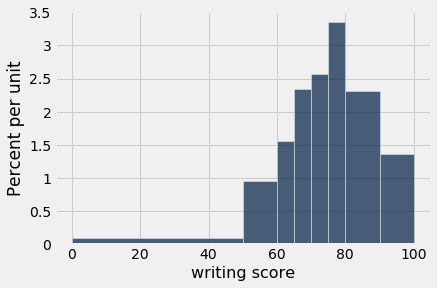

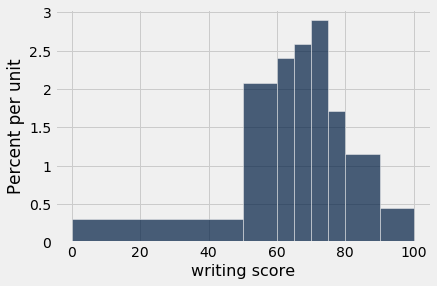

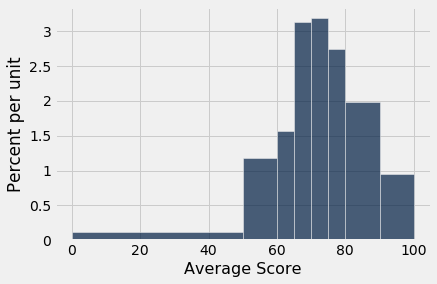

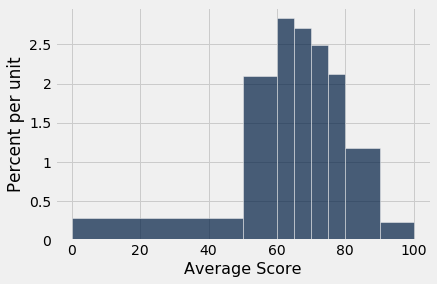

In [80]:
preparationTable=grades.with_column(
    "preparation",background["test preparation course"]
)

def histOfTable(preparationType,columnName):# Function for creating hist
    preparationTable.where("preparation",are.equal_to(preparationType)).select(columnName).hist(bins=[0,50,60,65,70,75,80,90,100])
#Math
histOfTable("completed","math score")
histOfTable("none","math score")
#Reading
histOfTable("completed","reading score")
histOfTable("none","reading score")
#Writing
histOfTable("completed","writing score")
histOfTable("none","writing score")
#Avg
histOfTable("completed","Average Score")
histOfTable("none","Average Score")

# 11. Education Level

In [133]:
educationTable=Table().with_columns(
    "education",background["parental level of education"],
    "letter",grades["Letter Grade"]
).where("letter",are.between_or_equal_to("A","B"))
#Creates table with education and letter and filters by letter A and B

#Returns size of the tables
educatedParentSize=educationTable.where("education",are.not_between_or_equal_to("high school","some high school")).size[0][0]
highSchoolParentSize=educationTable.where("education",are.between_or_equal_to("some high school","high school")).size[0][0]

print("Parents had an education higher than high school is",educatedParentSize)
print("Parents had an education of high school is",highSchoolParentSize)

#Calculates the percentage
educatedPercentage=(educatedParentSize/(educatedParentSize+highSchoolParentSize))*100
highSchoolPercentage=(highSchoolParentSize/(educatedParentSize+highSchoolParentSize))*100

print("Above highschool percentage is",educatedPercentage,"Highschool percentage is",highSchoolPercentage)

Parents had an education higher than high school is 84
Parents had an education of high school is 46
Above highschool percentage is 64.61538461538461 Highschool percentage is 35.38461538461539


# 12. Gender/Ethnic Grid

In [88]:
background.with_column(
    "letter",grades["Letter Grade"]
).where("letter",are.equal_to("A")).pivot("race/ethnicity","gender") 
#First adds column letter to background than filters with where by letter grade A

gender,group A,group B,group C,group D,group E
female,1,5,6,11,11
male,3,2,6,1,3
